**Import statements**

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Loading Data**
To load the data from the csv file that you copied just now, type the following statement and run the code

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stress Prediction Quetionnaire.csv to Stress Prediction Quetionnaire.csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['Stress Prediction Quetionnaire.csv'].decode('utf-8')),header=0)

You will also be able to examine the loaded data by running the following code statement −

In [ ]:
df.head()

,Do you ever suffer from any of the following? [Headaches],Do you ever suffer from any of the following? [Anxiety],Do you ever suffer from any of the following? [Chest pain/palpitations],Do you ever suffer from any of the following? [Indigestion or nausea],Do you ever suffer from any of the following? [Sleeplessness],Do you ever suffer from any of the following? [Irritability],Do you ever suffer from any of the following? [Backache],Do you ever suffer from any of the following? [Neckache],Do you ever suffer from any of the following? [Stomach disorders],Do you ever suffer from any of the following? [Inability to concentrate],Do any of the following cause problems for you at work? [Noise],Do any of the following cause problems for you at work? [Poor/inadequate lighting],Do any of the following cause problems for you at work? [Excessive heat],Do any of the following cause problems for you at work? [Excessive cold],Do any of the following cause problems for you at work? [Overcrowding],Do any of the following cause problems for you at work? [Poor ventilation],Do any of the following cause problems for you at work? [Dust or fumes],Do any of the following cause problems for you at work? [Poor maintenance of equipment],Do you find any of the following cause problems? [Shiftwork],Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes],Do you find any of the following cause problems? [Unsocial hours],Do you find any of the following cause problems? [Very heavy workload],Do you find any of the following cause problems? [Unfair distribution of work],Do you find any of the following cause problems? [Repetitive/boring work],Do you find any of the following cause problems? [Meeting deadlines],"Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]",Do you find any of the following cause problems? [Poor supervision],Do you find any of the following cause problems? [Under-utilisation of skills],"Regarding working relationships, do any of the following cause you problems? [Poor relations with supervisor / team leader / HoD]","Regarding working relationships, do any of the following cause you problems? [Poor relations with workmates]","Regarding working relationships, do any of the following cause you problems? [Harassment and/or discrimination]","Regarding working relationships, do any of the following cause you problems? [Impersonal treatment]","Regarding working relationships, do any of the following cause you problems? [Lack of communication from management]","Regarding working relationships, do any of the following cause you problems? [Working with the public]",Do you feel you: [Are underpaid],Do you feel you: [Are undervalued],Do you feel you: [Receive appreciation for good work],Score,Label
0,1,1,0,1,1,1,1,1,0,1,2,0,2,0,2,2,2,1,0,1,0,2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,2,28,No
1,1,1,0,0,1,2,2,2,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16,No
2,1,0,1,1,1,2,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,17,No
3,0,1,0,0,1,1,1,1,0,1,2,1,0,2,1,0,0,0,1,2,1,2,1,2,2,1,0,1,1,1,0,0,1,0,0,1,1,30,No
4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,2,2,2,2,0,1,19,No


Next, we need to clean the data. The data may contain some rows with NaN. To eliminate such rows, use the following command − Fortunately, the stress prediction.csv does not contain any rows with NaN, so this step is not truly required in our case. However, in general it is difficult to discover such rows in a huge database. So it is always safer to run the above statement to clean the data.

You can easily examine the data size at any point of time by using the following statement −

In [ ]:
print (df.shape)

(556, 39)


**Displaying All Fields**
Now, let us see how to select the data fields useful to us. Run the following statement in the code editor.

In [ ]:
print(list(df.columns))

['Do you ever suffer from any of the following? [Headaches]', 'Do you ever suffer from any of the following? [Anxiety]', 'Do you ever suffer from any of the following? [Chest pain/palpitations]', 'Do you ever suffer from any of the following? [Indigestion or nausea]', 'Do you ever suffer from any of the following? [Sleeplessness]', 'Do you ever suffer from any of the following? [Irritability]', 'Do you ever suffer from any of the following? [Backache]', 'Do you ever suffer from any of the following? [Neckache]', 'Do you ever suffer from any of the following? [Stomach disorders]', 'Do you ever suffer from any of the following? [Inability to concentrate]', 'Do any of the following cause problems for you at work? [Noise]', 'Do any of the following cause problems for you at work? [Poor/inadequate lighting]', 'Do any of the following cause problems for you at work? [Excessive heat]', 'Do any of the following cause problems for you at work? [Excessive cold]', 'Do any of the following cause p

**Eliminating Unwanted Fields**
Examining the column names, you will know that some of the fields have no significance to the problem at hand. For example, fields such as time stamp, email id, age, no of years experience, gender, etc. are of no use to us. We will eliminate these fields from our database. To drop a column, we use the drop command as shown below −

In [ ]:
#drop columns which are not needed.
df.drop(df.columns[[37]], axis = 1, inplace = True)

In [ ]:
df.head()

,Do you ever suffer from any of the following? [Headaches],Do you ever suffer from any of the following? [Anxiety],Do you ever suffer from any of the following? [Chest pain/palpitations],Do you ever suffer from any of the following? [Indigestion or nausea],Do you ever suffer from any of the following? [Sleeplessness],Do you ever suffer from any of the following? [Irritability],Do you ever suffer from any of the following? [Backache],Do you ever suffer from any of the following? [Neckache],Do you ever suffer from any of the following? [Stomach disorders],Do you ever suffer from any of the following? [Inability to concentrate],Do any of the following cause problems for you at work? [Noise],Do any of the following cause problems for you at work? [Poor/inadequate lighting],Do any of the following cause problems for you at work? [Excessive heat],Do any of the following cause problems for you at work? [Excessive cold],Do any of the following cause problems for you at work? [Overcrowding],Do any of the following cause problems for you at work? [Poor ventilation],Do any of the following cause problems for you at work? [Dust or fumes],Do any of the following cause problems for you at work? [Poor maintenance of equipment],Do you find any of the following cause problems? [Shiftwork],Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes],Do you find any of the following cause problems? [Unsocial hours],Do you find any of the following cause problems? [Very heavy workload],Do you find any of the following cause problems? [Unfair distribution of work],Do you find any of the following cause problems? [Repetitive/boring work],Do you find any of the following cause problems? [Meeting deadlines],"Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]",Do you find any of the following cause problems? [Poor supervision],Do you find any of the following cause problems? [Under-utilisation of skills],"Regarding working relationships, do any of the following cause you problems? [Poor relations with supervisor / team leader / HoD]","Regarding working relationships, do any of the following cause you problems? [Poor relations with workmates]","Regarding working relationships, do any of the following cause you problems? [Harassment and/or discrimination]","Regarding working relationships, do any of the following cause you problems? [Impersonal treatment]","Regarding working relationships, do any of the following cause you problems? [Lack of communication from management]","Regarding working relationships, do any of the following cause you problems? [Working with the public]",Do you feel you: [Are underpaid],Do you feel you: [Are undervalued],Do you feel you: [Receive appreciation for good work],Label
0,1,1,0,1,1,1,1,1,0,1,2,0,2,0,2,2,2,1,0,1,0,2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,2,No
1,1,1,0,0,1,2,2,2,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,No
2,1,0,1,1,1,2,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,No
3,0,1,0,0,1,1,1,1,0,1,2,1,0,2,1,0,0,0,1,2,1,2,1,2,2,1,0,1,1,1,0,0,1,0,0,1,1,No
4,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,2,2,2,2,0,1,No


Now, we have only the fields which we feel are important for our data analysis and prediction. The importance of Data Scientist comes into picture at this step. The data scientist has to select the appropriate columns for model building.

**Logistic Regression in Python - Preparing Data**
For creating the classifier, we must prepare the data in a format that is asked by the classifier building module. We prepare the data by doing One Hot Encoding.

In [ ]:
In [10]: # creating one hot encoding of the categorical columns.
data = pd.get_dummies(df, columns =['Do you ever suffer from any of the following? [Headaches]','Do you find any of the following cause problems? [Under-utilisation of skills]','Do you find any of the following cause problems? [Poor supervision]','Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]','Do you find any of the following cause problems? [Meeting deadlines]','Do you find any of the following cause problems? [Repetitive/boring work]','Do you find any of the following cause problems? [Unfair distribution of work]' ,'Do any of the following cause problems for you at work? [Dust or fumes]','Do you find any of the following cause problems? [Shiftwork]','Do you find any of the following cause problems? [Very heavy workload]','Do you find any of the following cause problems? [Unsocial hours]','Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]','Do any of the following cause problems for you at work? [Poor maintenance of equipment]','Do you ever suffer from any of the following? [Anxiety]', 'Do you ever suffer from any of the following? [Chest pain/palpitations]', 'Do you ever suffer from any of the following? [Indigestion or nausea]', 'Do you ever suffer from any of the following? [Sleeplessness]', 'Do you ever suffer from any of the following? [Irritability]','Do you ever suffer from any of the following? [Backache]','Do you ever suffer from any of the following? [Neckache]','Do you ever suffer from any of the following? [Stomach disorders]','Do you ever suffer from any of the following? [Inability to concentrate]','Do any of the following cause problems for you at work? [Noise]','Do any of the following cause problems for you at work? [Poor/inadequate lighting]','Do any of the following cause problems for you at work? [Excessive heat]','Do any of the following cause problems for you at work? [Excessive cold]','Do any of the following cause problems for you at work? [Overcrowding]','Do any of the following cause problems for you at work? [Poor ventilation]','Regarding working relationships, do any of the following cause you problems? [Poor relations with supervisor / team leader / HoD]','Regarding working relationships, do any of the following cause you problems? [Poor relations with workmates]','Regarding working relationships, do any of the following cause you problems? [Harassment and/or discrimination]','Regarding working relationships, do any of the following cause you problems? [Impersonal treatment]','Regarding working relationships, do any of the following cause you problems? [Lack of communication from management]','Regarding working relationships, do any of the following cause you problems? [Working with the public]','Do you feel you: [Are underpaid]','Do you feel you: [Are undervalued]','Do you feel you: [Receive appreciation for good work]'])

In [ ]:
data.head()

,Label,Do you ever suffer from any of the following? [Headaches]_0,Do you ever suffer from any of the following? [Headaches]_1,Do you ever suffer from any of the following? [Headaches]_2,Do you find any of the following cause problems? [Under-utilisation of skills]_0,Do you find any of the following cause problems? [Under-utilisation of skills]_1,Do you find any of the following cause problems? [Under-utilisation of skills]_2,Do you find any of the following cause problems? [Poor supervision]_0,Do you find any of the following cause problems? [Poor supervision]_1,Do you find any of the following cause problems? [Poor supervision]_2,"Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_0","Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_1","Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_2",Do you find any of the following cause problems? [Meeting deadlines]_0,Do you find any of the following cause problems? [Meeting deadlines]_1,Do you find any of the following cause problems? [Meeting deadlines]_2,Do you find any of the following cause problems? [Repetitive/boring work]_0,Do you find any of the following cause problems? [Repetitive/boring work]_1,Do you find any of the following cause problems? [Repetitive/boring work]_2,Do you find any of the following cause problems? [Unfair distribution of work]_0,Do you find any of the following cause problems? [Unfair distribution of work]_1,Do you find any of the following cause problems? [Unfair distribution of work]_2,Do any of the following cause problems for you at work? [Dust or fumes]_0,Do any of the following cause problems for you at work? [Dust or fumes]_1,Do any of the following cause problems for you at work? [Dust or fumes]_2,Do you find any of the following cause problems? [Shiftwork]_0,Do you find any of the following cause problems? [Shiftwork]_1,Do you find any of the following cause problems? [Shiftwork]_2,Do you find any of the following cause problems? [Very heavy workload]_0,Do you find any of the following cause problems? [Very heavy workload]_1,Do you find any of the following cause problems? [Very heavy workload]_2,Do you find any of the following cause problems? [Unsocial hours]_0,Do you find any of the following cause problems? [Unsocial hours]_1,Do you find any of the following cause problems? [Unsocial hours]_2,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_0,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_1,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_2,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_0,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_1,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_2,...,Do any of the following cause problems for you at work? [Poor/inadequate lighting]_2,Do any of the following cause problems for you at work? [Excessive heat]_0,Do any of the following cause problems for you at work? [Excessive heat]_1,Do any of the following cause problems for you at work? [Excessive heat]_2,Do any of the following cause problems for you at work? [Excessive cold]_0,Do any of the following cause problems for you at work? [Excessive cold]_1,Do any of the following cause problems for you at work? [Excessive cold]_2,Do any of the following cause problems for you at work? [Overcrowding]_0,Do any of the following cause problems for you at work? [Overcrowding]_1,Do any of the following cause problems for you at work? [Overcrowding]_2,Do any of the following cause problems for you at work? [Poor ventilation]_0,Do any of the following cause problems for you at work? [Poor ventilation]_1,Do any of the following cause problems for you at work? [Poor ventilation]_2,"Regarding working relationships, do any of

To understand the above data, we will list out the column names by running the data.columns command as shown below −

In [ ]:
data.columns

Index(['Label', 'Do you ever suffer from any of the following? [Headaches]_0',
       'Do you ever suffer from any of the following? [Headaches]_1',
       'Do you ever suffer from any of the following? [Headaches]_2',
       'Do you find any of the following cause problems? [Under-utilisation of skills]_0',
       'Do you find any of the following cause problems? [Under-utilisation of skills]_1',
       'Do you find any of the following cause problems? [Under-utilisation of skills]_2',
       'Do you find any of the following cause problems? [Poor supervision]_0',
       'Do you find any of the following cause problems? [Poor supervision]_1',
       'Do you find any of the following cause problems? [Poor supervision]_2',
       ...
       'Regarding working relationships, do any of the following cause you problems? [Working with the public]_2',
       'Do you feel you: [Are underpaid]_0',
       'Do you feel you: [Are underpaid]_1',
       'Do you feel you: [Are underpaid]_2',
       

**Understanding Data Mapping**
To understand the generated data, let us print out the entire data using the data command. The partial output after running the command is shown below.

In [ ]:
data

,Label,Do you ever suffer from any of the following? [Headaches]_0,Do you ever suffer from any of the following? [Headaches]_1,Do you ever suffer from any of the following? [Headaches]_2,Do you find any of the following cause problems? [Under-utilisation of skills]_0,Do you find any of the following cause problems? [Under-utilisation of skills]_1,Do you find any of the following cause problems? [Under-utilisation of skills]_2,Do you find any of the following cause problems? [Poor supervision]_0,Do you find any of the following cause problems? [Poor supervision]_1,Do you find any of the following cause problems? [Poor supervision]_2,"Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_0","Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_1","Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_2",Do you find any of the following cause problems? [Meeting deadlines]_0,Do you find any of the following cause problems? [Meeting deadlines]_1,Do you find any of the following cause problems? [Meeting deadlines]_2,Do you find any of the following cause problems? [Repetitive/boring work]_0,Do you find any of the following cause problems? [Repetitive/boring work]_1,Do you find any of the following cause problems? [Repetitive/boring work]_2,Do you find any of the following cause problems? [Unfair distribution of work]_0,Do you find any of the following cause problems? [Unfair distribution of work]_1,Do you find any of the following cause problems? [Unfair distribution of work]_2,Do any of the following cause problems for you at work? [Dust or fumes]_0,Do any of the following cause problems for you at work? [Dust or fumes]_1,Do any of the following cause problems for you at work? [Dust or fumes]_2,Do you find any of the following cause problems? [Shiftwork]_0,Do you find any of the following cause problems? [Shiftwork]_1,Do you find any of the following cause problems? [Shiftwork]_2,Do you find any of the following cause problems? [Very heavy workload]_0,Do you find any of the following cause problems? [Very heavy workload]_1,Do you find any of the following cause problems? [Very heavy workload]_2,Do you find any of the following cause problems? [Unsocial hours]_0,Do you find any of the following cause problems? [Unsocial hours]_1,Do you find any of the following cause problems? [Unsocial hours]_2,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_0,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_1,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_2,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_0,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_1,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_2,...,Do any of the following cause problems for you at work? [Poor/inadequate lighting]_2,Do any of the following cause problems for you at work? [Excessive heat]_0,Do any of the following cause problems for you at work? [Excessive heat]_1,Do any of the following cause problems for you at work? [Excessive heat]_2,Do any of the following cause problems for you at work? [Excessive cold]_0,Do any of the following cause problems for you at work? [Excessive cold]_1,Do any of the following cause problems for you at work? [Excessive cold]_2,Do any of the following cause problems for you at work? [Overcrowding]_0,Do any of the following cause problems for you at work? [Overcrowding]_1,Do any of the following cause problems for you at work? [Overcrowding]_2,Do any of the following cause problems for you at work? [Poor ventilation]_0,Do any of the following cause problems for you at work? [Poor ventilation]_1,Do any of the following cause problems for you at work? [Poor ventilation]_2,"Regarding working relationships, do any of

**Logistic Regression in Python - Splitting Data**
We have about 556 records. If we use the entire data for model building, we will not be left with any data for testing. So generally, we split the entire data set into two parts, say 70/30 percentage. We use 70% of the data for model building and the rest for testing the accuracy in prediction of our created model. You may use a different splitting ratio as per your requirement.

**Creating Features Array**
Before we split the data, we separate out the data into two arrays X and Y. The X array contains all the features (data columns) that we want to analyze and Y array is a single dimensional array of boolean values that is the output of the prediction. To understand this, let us run some code.

In [ ]:
X = data.iloc[:,1:]

In [ ]:
X.head ()

,Do you ever suffer from any of the following? [Headaches]_0,Do you ever suffer from any of the following? [Headaches]_1,Do you ever suffer from any of the following? [Headaches]_2,Do you find any of the following cause problems? [Under-utilisation of skills]_0,Do you find any of the following cause problems? [Under-utilisation of skills]_1,Do you find any of the following cause problems? [Under-utilisation of skills]_2,Do you find any of the following cause problems? [Poor supervision]_0,Do you find any of the following cause problems? [Poor supervision]_1,Do you find any of the following cause problems? [Poor supervision]_2,"Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_0","Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_1","Do you find any of the following cause problems? [Job insecurity, eg threat of redundancy]_2",Do you find any of the following cause problems? [Meeting deadlines]_0,Do you find any of the following cause problems? [Meeting deadlines]_1,Do you find any of the following cause problems? [Meeting deadlines]_2,Do you find any of the following cause problems? [Repetitive/boring work]_0,Do you find any of the following cause problems? [Repetitive/boring work]_1,Do you find any of the following cause problems? [Repetitive/boring work]_2,Do you find any of the following cause problems? [Unfair distribution of work]_0,Do you find any of the following cause problems? [Unfair distribution of work]_1,Do you find any of the following cause problems? [Unfair distribution of work]_2,Do any of the following cause problems for you at work? [Dust or fumes]_0,Do any of the following cause problems for you at work? [Dust or fumes]_1,Do any of the following cause problems for you at work? [Dust or fumes]_2,Do you find any of the following cause problems? [Shiftwork]_0,Do you find any of the following cause problems? [Shiftwork]_1,Do you find any of the following cause problems? [Shiftwork]_2,Do you find any of the following cause problems? [Very heavy workload]_0,Do you find any of the following cause problems? [Very heavy workload]_1,Do you find any of the following cause problems? [Very heavy workload]_2,Do you find any of the following cause problems? [Unsocial hours]_0,Do you find any of the following cause problems? [Unsocial hours]_1,Do you find any of the following cause problems? [Unsocial hours]_2,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_0,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_1,Do you find any of the following cause problems? [Inadequate breaktimes/mealtimes]_2,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_0,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_1,Do any of the following cause problems for you at work? [Poor maintenance of equipment]_2,Do you ever suffer from any of the following? [Anxiety]_0,...,Do any of the following cause problems for you at work? [Poor/inadequate lighting]_2,Do any of the following cause problems for you at work? [Excessive heat]_0,Do any of the following cause problems for you at work? [Excessive heat]_1,Do any of the following cause problems for you at work? [Excessive heat]_2,Do any of the following cause problems for you at work? [Excessive cold]_0,Do any of the following cause problems for you at work? [Excessive cold]_1,Do any of the following cause problems for you at work? [Excessive cold]_2,Do any of the following cause problems for you at work? [Overcrowding]_0,Do any of the following cause problems for you at work? [Overcrowding]_1,Do any of the following cause problems for you at work? [Overcrowding]_2,Do any of the following cause problems for you at work? [Poor ventilation]_0,Do any of the following cause problems for you at work? [Poor ventilation]_1,Do any of the following cause problems for you at work? [Poor ventil

**Creating Output Array**
To create an array for the predicted value column, use the following Python statement −

In [ ]:
Y = data.iloc[:,0]

In [ ]:
Y.head()

0    No
1    No
2    No
3    No
4    No
Name: Label, dtype: object

Now, split the data using the following command −

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# Test options and evaluation metric
seed = 10
scoring = 'accuracy'

This will create the four arrays called X_train, Y_train, X_test, and Y_test. As before, you may examine the contents of these arrays by using the head command. We will use X_train and Y_train arrays for training our model and X_test and Y_test arrays for testing and validating.

**Logistic Regression in Python - Building Classifier**
There are several pre-built libraries available in the market which have a fully-tested and very efficient implementation of these classifiers. We will use one such pre-built model from the sklearn.

**The sklearn Classifier**
Creating the Logistic Regression classifier from sklearn toolkit is trivial and is done in a single program statement as shown here −

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=6, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f" % (name, cv_results.mean())
	print(msg)

LR: 0.973568
LDA: 0.918288
KNN: 0.927916
CART: 0.908765
NB: 0.944893
SVM: 0.951863
RFC: 0.937440


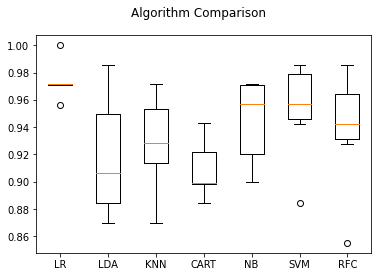

In [ ]:
# Compare Algorithms 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [ ]:
# Make predictions on validation dataset using Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print(accuracy_score(Y_test, predictions))
cnf = confusion_matrix(Y_test, predictions)
print(cnf)
print(classification_report(Y_test, predictions))

0.935251798561151
[[118   0]
 [  9  12]]
              precision    recall  f1-score   support

          No       0.93      1.00      0.96       118
         Yes       1.00      0.57      0.73        21

    accuracy                           0.94       139
   macro avg       0.96      0.79      0.85       139
weighted avg       0.94      0.94      0.93       139



The input must be defined as an array of numbers, specifically 1 row with 36 columns (our questionnaire attributes). We can achieve this by defining the example as a list of rows with a list of columns for each row; In this output 1 determines that particular person is undergoing stress and if the output is 0 then he is not having stress.

In [ ]:

# make a single prediction with the model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# create the inputs and outputs
X, y = make_blobs(n_samples=1000, centers=2, n_features=36, random_state=2)
# define model
model = LogisticRegression(solver='lbfgs')
# fit model
model.fit(X, y)
# define input
new_input1 = [[1,0,1,2,1,2,1,0,0,0,0,0,2,0,0,0,1,1,1,1,1,0,0,0,0,1,2,1,2,1,1,0,0,0,1,2]]
new_input2 = [[1,2,1,2,1,2,1,2,2,2,2,0,2,2,2,0,1,1,1,1,1,0,2,2,0,1,2,1,2,1,1,2,2,0,1,2]]
# get prediction for new input
new_output1 = model.predict(new_input1)
new_output2 = model.predict(new_input2)
# summarize input and output
print(new_input1, new_output1)
print(new_input2, new_output2)


[[1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2]] [0]
[[1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2]] [1]


Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

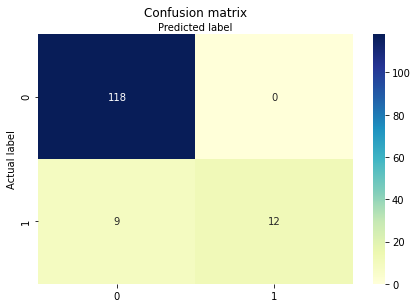

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

**Advantages**
Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

**Disadvantages**
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.